# Preamble

In [1]:
import h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import seaborn as sns
from plot_params import params
matplotlib.pylab.rcParams.update(params)

In [2]:
yr = 2*np.pi
Gyr = 1e9 * yr

# Load data

first axis: particle number (total 256) \
second axis: time \
third axis: values [time, x, y, z, v_x, v_y, v_z] \

units: \
-- time: year = 2*np.pi \
-- x,y,z: AU = 1 \
-- v_x,v_y,v_z: 30 km/s = 1 \

In [3]:
# Load data from JLD2 file
with h5py.File('scratch2/sun_stride256.jld2', 'r') as f:
    arr_forward = np.asarray(f['particle_txv'][:])
np.shape(arr_forward)

(256, 10000, 7)

In [4]:
# Load data from JLD2 file
with h5py.File('scratch2/earth_stride256.jld2', 'r') as f:
    arr_backward = np.asarray(f['particle_txv'][:])
np.shape(arr_backward)

(256, 10000, 7)

# Functions

In [5]:
def a_particle(vec):
    x = vec[:,1:4]
    v = vec[:,4:7]
    e = 0.5 * np.linalg.norm(v,axis=1)**2 -1/np.linalg.norm(x,axis=1)
    return -0.5 / e

# Forwards Plot

In [6]:
idx_0 = arr_forward[:,:,0]!=0

arr_a_forward = np.zeros((np.shape(arr_forward)[0],np.shape(arr_forward)[1],2))
for i in range(len(arr_forward)):
    tmp_t = arr_forward[i,:,0] / Gyr
    tmp_a = a_particle(arr_forward[i,:])
    tmp_a[tmp_a<0.3]=np.nan
    arr_a_forward[i,:,0]=tmp_t
    arr_a_forward[i,:,1]=tmp_a

/var/folders/dz/9bww86957tj5p8v0rpbpr3n00000gn/T/ipykernel_63011/580469562.py:4: RuntimeWarning: divide by zero encountered in divide
  e = 0.5 * np.linalg.norm(v,axis=1)**2 -1/np.linalg.norm(x,axis=1)


## Full Pollock

In [7]:
fig,ax = plt.subplots(1,1,figsize=(16,8))
pal = sns.color_palette('Set2')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=pal)
for i in range(len(arr_a_forward)):
# for i in np.random.randint(low=0,high=len(arr_a),size=20):
    ax.plot(arr_a_forward[i,:,0],arr_a_forward[i,:,1],alpha=0.5,lw=1)
ax.set_xlim(0,4.5)
ax.set_ylim(0.3,4)
ax.set_yscale('log')
# ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3],minor=False)
# ax.set_yticklabels(['$0.3$','','$0.5$','','$0.7$','','','$1$','$2$','$3$']);
# ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3],minor=True)
ax.set_yticks([0.3,0.4,0.6,0.8,1,2,3,4],minor=False)
ax.set_yticklabels(['$0.3$','$0.4$','$0.6$','$0.8$','$1$','$2$','$3$','$4$']);


ax.set_xlabel(r'$t~\mathrm{[Gyr]}$');
ax.set_ylabel(r'$a~\mathrm{[AU]}$');
# ax.grid()

## Gray Pollock, plus highlights

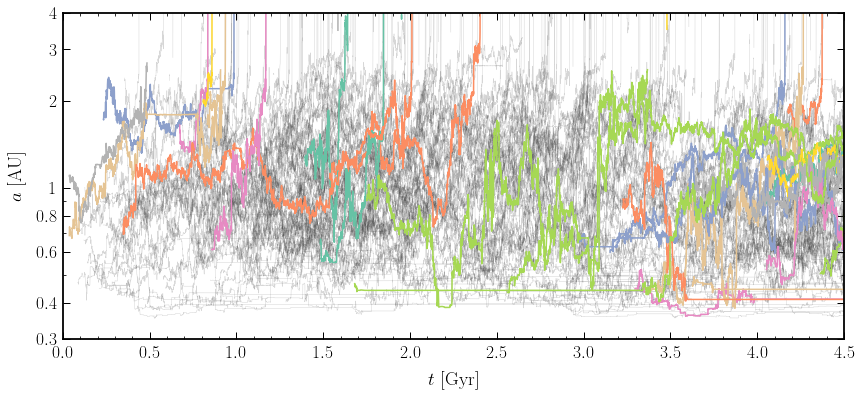

In [45]:
fig,ax = plt.subplots(1,1,figsize=(14,6))
pal = sns.color_palette('Set2')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=pal)
for i in range(len(arr_a_forward)):
# for i in np.random.randint(low=0,high=len(arr_a),size=20):
    ax.plot(arr_a_forward[i,:,0],arr_a_forward[i,:,1],lw=.5,color=(0.2,0.2,0.2,0.2))
for i in range(0,len(arr_a_forward),8):
    ax.plot(arr_a_forward[i,:,0],arr_a_forward[i,:,1],lw=1.5)
ax.set_xlim(0,4.5)
ax.set_ylim(0.3,4)
ax.set_yscale('log')
# ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3],minor=False)
# ax.set_yticklabels(['$0.3$','','$0.5$','','$0.7$','','','$1$','$2$','$3$']);
# ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3],minor=True)
ax.set_yticks([0.3,0.4,0.6,0.8,1,2,3,4],minor=False)
ax.set_yticklabels(['$0.3$','$0.4$','$0.6$','$0.8$','$1$','$2$','$3$','$4$']);


ax.set_xlabel(r'$t~\mathrm{[Gyr]}$');
ax.set_ylabel(r'$a~\mathrm{[AU]}$');
plt.savefig('trajectories_forwards.pdf',bbox_inches='tight')
# ax.grid()

# Backwards Plot

In [39]:
arr_a_backward = np.zeros((np.shape(arr_backward)[0],np.shape(arr_backward)[1],2))
for i in range(len(arr_backward)):
    tmp_t = arr_backward[i,:,0] / Gyr
    tmp_a = a_particle(arr_backward[i,:])
    tmp_a[tmp_a<0.3]=np.nan
    arr_a_backward[i,:,0]=tmp_t
    arr_a_backward[i,:,1]=tmp_a

/var/folders/dz/9bww86957tj5p8v0rpbpr3n00000gn/T/ipykernel_62447/580469562.py:4: RuntimeWarning: divide by zero encountered in divide
  e = 0.5 * np.linalg.norm(v,axis=1)**2 -1/np.linalg.norm(x,axis=1)


## Full Pollock

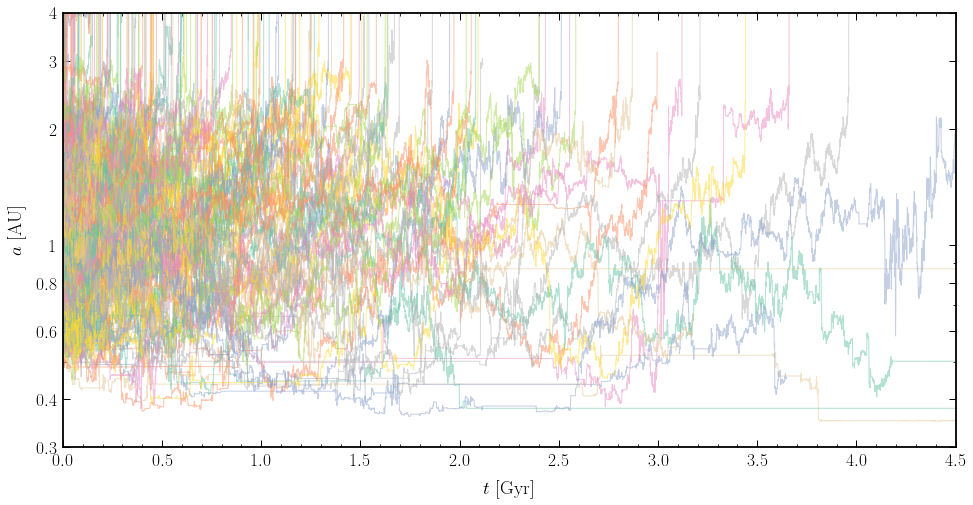

In [40]:
fig,ax = plt.subplots(1,1,figsize=(16,8))
pal = sns.color_palette('Set2')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=pal)
for i in range(len(arr_a_backward)):
# for i in np.random.randint(low=0,high=len(arr_a),size=20):
    ax.plot(arr_a_backward[i,:,0],arr_a_backward[i,:,1],alpha=0.5,lw=1)
ax.set_xlim(0,4.5)
ax.set_ylim(0.3,4)
ax.set_yscale('log')
# ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3],minor=False)
# ax.set_yticklabels(['$0.3$','','$0.5$','','$0.7$','','','$1$','$2$','$3$']);
# ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3],minor=True)
ax.set_yticks([0.3,0.4,0.6,0.8,1,2,3,4],minor=False)
ax.set_yticklabels(['$0.3$','$0.4$','$0.6$','$0.8$','$1$','$2$','$3$','$4$']);


ax.set_xlabel(r'$t~\mathrm{[Gyr]}$');
ax.set_ylabel(r'$a~\mathrm{[AU]}$');
# ax.grid()

## Gray Pollock, plus highlights

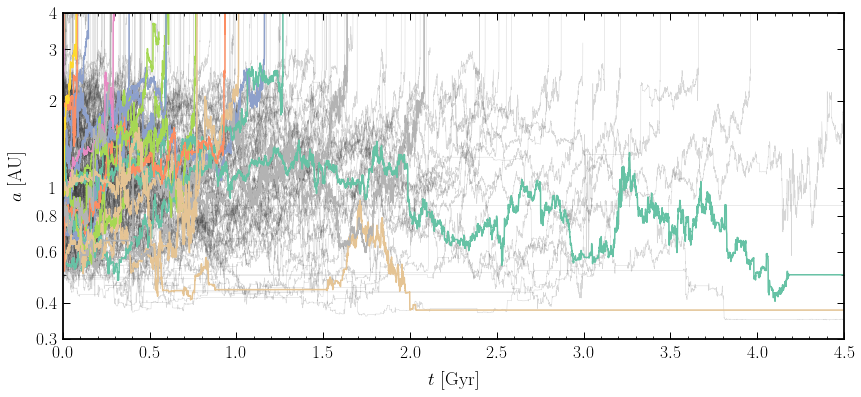

In [42]:
fig,ax = plt.subplots(1,1,figsize=(14,6))
pal = sns.color_palette('Set2')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=pal)
for i in range(len(arr_a_backward)):
# for i in np.random.randint(low=0,high=len(arr_a),size=20):
    ax.plot(arr_a_backward[i,:,0],arr_a_backward[i,:,1],lw=0.5,color=(0.2,0.2,0.2,0.2))
for i in range(0,len(arr_a_backward),8):
    ax.plot(arr_a_backward[i,:,0],arr_a_backward[i,:,1],lw=1.5,alpha=1)
ax.set_xlim(0,4.5)
ax.set_ylim(0.3,4)
ax.set_yscale('log')
# ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3],minor=False)
# ax.set_yticklabels(['$0.3$','','$0.5$','','$0.7$','','','$1$','$2$','$3$']);
# ax.set_yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3],minor=True)
ax.set_yticks([0.3,0.4,0.6,0.8,1,2,3,4],minor=False)
ax.set_yticklabels(['$0.3$','$0.4$','$0.6$','$0.8$','$1$','$2$','$3$','$4$']);


ax.set_xlabel(r'$t~\mathrm{[Gyr]}$');
ax.set_ylabel(r'$a~\mathrm{[AU]}$');

plt.savefig('trajectories_backwards.pdf',bbox_inches='tight')
# ax.grid()